<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, Lecture 9 Day 2</div>
<div style="text-align: right">Dino Konstantopoulos, 5 November 2020</div>

# Why eugenics don't work

Last class, where we explored the dark hsitory of statistics, I told you that diversity is more *powerful* than eugenics.

What do I mean by powerful?

Galton's claim that we can achieve a *better* society by selective breeding amongst humans included metrics of *intelligence, strength*, and *beauty*. 

<br />
<center>
    <img src="ipynb.images/ramanujan-ferrigno-zhiyi.png" width=900 />
</center>

These characteristics are called [phenotypes](https://en.wikipedia.org/wiki/Phenotype) of a society, whereas the mechanism responsible for expressing these characteristics are each individual's [genotype](https://en.wikipedia.org/wiki/Genotype).

Is Galton's statement truthful?

We would like to see if we pick a population and a phenotype, is selectively breeding the population in order to achieve the best possible phenotype *the best possible way to achieve this*? In other words, is attempting to optimize the genotype the *fastest, most effective* way to the answer?

Or will allowing the population to express all the diversity of its genotype by allowing the population to *freely* pick their own individuals to mate, in other words allowing the genotype to freely explore *all* possible configurations, achieve *better* and *quicker* results?

So let's pick a phenotype we can express in *code*: Let's select an **integer** as the pinnacle of beauty/strength/intelligence. For example, I think the number `23` is incredibly *sexy*, don't you? 

<br />
<center>
    <img src="ipynb.images/23.jpg" width=400 />
</center>

How do we reach that number? Well, with **addition** and **multiplication** of course! So let's breed a population that can learn to add and multiply in order to reach that incredibly sexy integer (or any other integer *you* find sexier)!

# A Chromosome

A chromosome is a binary string a little bit like this:

<br />
<center>
    <img src="ipynb.images/binary-chromosome.png" width=500 />
</center>

Humans have 30,000 genes in their [genome](https://www.genome.gov/human-genome-project/Completion-FAQ). Each gene is made of two twisting paired strands. Each strand is made of four chemical units, called nucleotide bases. The bases are adenine (`A`), thymine (`T`), guanine (`G`) and cytosine (`C`). Bases on opposite strands pair specifically: An `A` always pairs with a `T`, and a `C` always with a `G`. 

So, let's assume our chemical units are 4 sequences of `0`s and `1`s :-) 

>**Question**: How many genes in the chromosome example above?

At the beginning of a run of our genetic algorithm, a large population of random chromosomes will be created.

Each chromosome, when decoded, will represent a different **solution** as to how to multiply and add in order to achieve that *sexy number*. That way, we have ourselves a *genotype* and a *phenotype*!

To test each chromosome to see how good it is at solving the problem at hand, we assign it a **fitness score**. That is how we evaluate how *sexy* the chromosome is: Near or far-away from that pinnacle of sexiness, the number 23!

That fitness score, of course, is a measure of how good that chromosome is at solving the problem to hand: Getting to our sexy number.

<br />
<center>
    <img src="ipynb.images/oh-no.jpg" width=300 />
</center>

# Mating (reproduction)

Reproduction will consist of chromosome **crossover**, performed by two genes, picking a point along the length of their chromosomes, and swapping genes after that point.

<br />
<center>
    <img src="ipynb.images/ga-reproduction.png" width=400 />
</center>

Fred and Wilma give us bammbamm and pebbles :-)

<br />
<center>
    <img src="ipynb.images/flintstones-family.jpg" width=400 />
</center>

Humans (as well as prehistoric humans) reproduce in... a bit more complicated way, of course ;-)

# Mutation

Our chromosomes, just like humans (and Lou Ferrigno, a.k.a The [Hulk](https://en.wikipedia.org/wiki/Hulk)), sometimes *mutate*.


<br />
<center>
    <img src="ipynb.images/ga-mutate.png" width=300 />
</center>

The **mutation rate** is the probability that a bit within a chromosome will be flipped (`0` becomes `1`, `1` becomes `0`). This is usually a very low value for binary encoded genes, say 0.001.

# Encoding

Four bits (a “short”) are required to represent the range of characters we'll use to add and multiply integers:

<br />
<center>
    <img src="ipynb.images/ga-encoding.png" width=130 />
</center>

The possible genes `1110` and `1111` will remain unused and will be ignored by our algorithm if encountered.

We will also ignore any non-sensical operations. For example, we expect a number to be followed by a math operation. If it doesn't, then the next gene (the 4 bits) will simply be *ignored* and we will move on to the next.

# A sexy chromosome

Here's a solution for getting to that pinnacle of sexiness: The number $23$: $6+5*4/2+1$:
* $11 * 4 = 44$
* $44/2 = 22$
* $22 + 1 = 23$

That solution would be represented by nine genes like so:

<br />
<center>
    <img src="ipynb.images/23-solution-1.png" width=500 />
</center>

>**Note**: Arithmetic is read ***left to right*** (*not* the usual arithmetic associative rules)

And thus a perfect sexy chromosome is:

<br />
<center>
    <img src="ipynb.images/23-solution-2.png" width=500 />
</center>

But that's not the only one!

# Fitness function

How do we grade our chromosomes for sexiness? Let's consider what happens when you're not the sexiest possible individual in the world...

Let's move from Chicago to the Boston scene where `23` ain't that sexy anymore, and consider a *local* phenomenon of beauty: the number `42`:

<br />
<center>
    <img src="ipynb.images/al-horford-42.jpg" width=500 />
</center>

Let's assign $\infty$ fitness to chromosomes expressing our now-sexiest number 42, and the following fitness score to all others:

$$\text{score} = 1/(42 - \text{bits-sum})$$

So, our previously-beautiful chromosome 23...

<br />
<center>
    <img src="ipynb.images/23-solution-3.png" width=500 />
</center>

..has a fitness score of $1/(42-23)$ or $1/19$.

But, since infinity creates a slight problem with code, let's remormalize $1/0$ to $1/1$ when we encounter a $0$ in the denominator. 

So, the closer we get to the sexiest solution, the closer we get to 1, the sexier we are!

# Roulette wheel selection

Now we have to pick realistic strategies for 1) how a *free* society reproduces, 2) one where reproduction is dictated by forcing *sexiest* chromosomes to reproduce (eugenics), and 3) one where society is *stratified* into *castes* and forced to reproduce within a caste system (allowing for spurious exceptions).

How individuals pick each other to mate in a free society picks is not a *new* algorithm. In fact, it is a well-known algorithm called [fitness-proportionate-selection](https://en.wikipedia.org/wiki/Fitness_proportionate_selection), also known as *roulette wheel selection*.

<br />
<center>
    <img src="ipynb.images/roulette-wheel-selection.png" width=500 />
</center>

The algorithm recognizes that very sexy chromosomes will be attracted to each other, but leaves open the possibility that a super sexy chromosome will be attracted to a not-so-sexy chromosome. In other words, your professor still has a chance to marry [Rihana](https://en.wikipedia.org/wiki/Rihanna). Not a big chance, in other words, a low probability, but still a possibility!

<br />
<center>
    <img src="ipynb.images/rihanna.jpg" width=500 />
</center>

Ready? Let's code!

Our hyperparameters, just a *swag* for now:

In [1]:
#CROSSOVER_RATE = 0.7
CROSSOVER_RATE = 0.6
MUTATION_RATE = 0.001
#POP_SIZE = 100 #must be an even number
POP_SIZE = 200
#CHROMO_LENGTH = 300
CHROMO_LENGTH = 100
GENE_LENGTH = 4
#MAX_ALLOWABLE_GENERATIONS = 400
MAX_ALLOWABLE_GENERATIONS = 500

Our chromosome has bits and a fitness score:

In [2]:
class chromo_typ:
    #def __init__():
    #    bits = ''
    #    fitness = 0.0
    def __init__(self, bts, ftns):
        self.bits = bts
        self.fitness = ftns

This is how we build the chromosome bits, using a random number generator:

In [3]:
# This function returns a string of random 1s and 0s of desired length
import random

def GetRandomBits(length):
    bits = []
    for i in range(length):
        x = random.random()
        if x > 0.5:
            bits.append("1")
        else:
            bits.append("0")
    return ''.join(bits)

Here's an example chromosome consisting of 100 bits:

In [4]:
example = GetRandomBits(CHROMO_LENGTH)
example

'1000000000100111100101111001100101011100011011010001100100101100110000101000010101111100000010001111'

This is how two chromosomes have sex and produce child chromosomes. Our chromosomes are very horny, but they only have sex 70% of the time ;-)

In [5]:
# Dependent on the CROSSOVER_RATE this function selects a random point along the 
# length of the chromosomes and swaps all the bits after that point.
def Crossover(offspring1, offspring2):
    newoffspring1 = ''
    newoffspring2 = ''    
    d = random.random()

    # dependent on the crossover rate
    if d < CROSSOVER_RATE:
        #print("sex!")
        # sex! Create a random crossover point
        crossover = int(d * CHROMO_LENGTH)

        t1 = offspring1[:crossover] + offspring2[crossover:]
        t2 = offspring2[:crossover] + offspring1[crossover:]

        newoffspring1 = t1
        newoffspring2 = t2
        
    else:
        # read a book instead
        newoffspring1 = offspring1
        newoffspring2 = offspring2
        
    return newoffspring1, newoffspring2

In [6]:
def Compare4Crossover(fred, offspring):
    s = ''
    for i in range(len(fred)):
        if fred[i] == offspring[i]:
            s += ' '
        else:
            s += '|'
            break
            
    return s

In [7]:
fred = GetRandomBits(CHROMO_LENGTH)
wilma = GetRandomBits(CHROMO_LENGTH)
bammbamm, pebbles = Crossover(fred, wilma)
print(fred)
print(wilma)
print(bammbamm)
print(Compare4Crossover(fred, bammbamm))
print(pebbles)
print(Compare4Crossover(fred, pebbles))

0110011011110110000001111101110001111010000000101001111001011001110110010110010010010010000000100110
0010000110010111001011110111010111010100100100100001011001010111100110110100110000111110111101101001
0110011011110110000001111111010111010100100100100001011001010111100110110100110000111110111101101001
                          |
0010000110010111001011110101110001111010000000101001111001011001110110010110010010010010000000100110
 |


Sometimes, gamma ray radiation from the sun produces genetic mutations. You know, like the ones Darwin predicted for species:

In [8]:
# Mutates a chromosome's bits dependent on the MUTATION_RATE
def Mutate(bits):
    s = ''
    for i in range(len(bits)):
        d = random.random()
        if d < MUTATION_RATE:
            if bits[i] == '1':
                s += '0'
                # bits[i] = '0'
            else:
                s += '1'
                # bits[i] = '1'
        else:
            s += bits[i]
            
    return s

In [9]:
def Compare4Mutation(bits1, bits2):
    s = ''
    for i in range(len(bits1)):
        if bits1[i] == bits2[i]:
            s += ' '
        else:
            s += '|'
            
    return s

In [10]:
print(example)
newexample = Mutate(example)
print(newexample)
Compare4Mutation(example, newexample)

1000000000100111100101111001100101011100011011010001100100101100110000101000010101111100000010001111
1000000000100111100101111001100101011100011011010001100100101100110000101000010101111100000010001111


'                                                                                                    '

And here is how chromosomes are selected to either have sex or to spontaneously mutate:

In [11]:
# Selects a chromosome from the population via roulette wheel selection
# population is a list of chromo_typ
def Roulette(total_fitness, population):
    # generate a random number between 0 & total fitness count, based on the input seed
    d = random.random() 
    slice = d * total_fitness

    # go through the chromosomes adding up the fitness so far
    fitnessSoFar = 0.0

    for i in range(POP_SIZE):
        fitnessSoFar += population[i].fitness

        # if the fitness so far > random number return the chromo at this point
        if fitnessSoFar >= slice:
            return population[i].bits
    return '(not fit enough)'

In [12]:
# Selects a chromosome from the population via roulette wheel selection
# population is a list of chromo_typ
def RouletteSuperiorFitness(total_fitness, population):
    # generate a random number between 0 & total fitness count, based on the input seed
    d = 0.6 
    
    slice = d * total_fitness
    
    # go through the chromosomes adding up the fitness so far
    fitnessSoFar = 0.0

    for i in range(POP_SIZE):
        fitnessSoFar += population[i].fitness

        # if the fitness so far > random number return the chromo at this point
        if fitnessSoFar >= slice:
            return population[i].bits
    return 'KILL'

In [52]:
# Selects a chromosome from the population via roulette wheel selection
# population is a list of chromo_typ
def RouletteCaste(total_fitness, population):
    # generate a random number between 0 & total fitness count, based on the input seed
    d = random.random()
    
    brahmin = 0.75
    kshatriya = 0.15
    vayshya = 0.8
    shudra = 0.2
    
    slice = d * total_fitness
    
    # go through the chromosomes adding up the fitness so far
    fitnessSoFar = 0.0

    for i in range(POP_SIZE):
        fitnessSoFar += population[i].fitness

        # if the fitness so far > random number return the chromo at this point
        if fitnessSoFar >= slice:
            
            if slice > brahmin:
                return population[i].bits
            elif slice > kshatriya and slice < brahmin:
                return 'cant mate with kshatriya'
            elif slice > vayshya and slice < kshatriya:
                
                return 'cant mate with vayshya'
            else:
                
                return 'cant mate with shudra'
    return 'cant mate because of caste restriction'

# Transcription layer

Here is our transcription layer. It's the equivalent of RNA to DNA transcription in living species on our planet:

In [14]:
def BinToDec(bits):
    val = 0
    value_to_add = 1

    for i in range(len(bits), 0, -1):
        if bits[i - 1] == '1':
            val += value_to_add
        value_to_add *= 2

    return val

In [15]:
#  Given a chromosome, this function will step through the genes one at a time and insert 
#  the decimal values of each gene (which follow the number -> operator -> number -> operator rule)
#  into a buffer. Returns the number of elements in the buffer, and the buffer as an out arg.
#  In other words, this is our DNA to RNA layer!
def ParseBits(bits, interpret = False):
    # buffer
    buffer = []
    # counter for buffer position
    cBuff = 0

    #  step through bits a gene at a time until end and store decimal values
    #  of valid operators and numbers. Don't forget we are looking for  
    #  number - operator - number - operator and so on... 
    #  We ignore unused genes 1111 and 1110

    #  flag to determine if we are looking for an operator or a number
    bOperator = False

    #  storage for decimal value of currently tested gene
    this_gene = 0

    for i in range(0, CHROMO_LENGTH, GENE_LENGTH):
        # convert the current gene to decimal
        this_gene = BinToDec(bits[i: i + GENE_LENGTH])

        # find a gene which represents an operator
        if bOperator:
            if this_gene < 10 or this_gene > 13:
                continue
            else:
                if not interpret:
                    buffer.append(this_gene)
                else:
                    buffer.append('+' if this_gene == 10 else '-' if this_gene == 11 else '*' if this_gene == 12 else '/')
                cBuff += 1
                bOperator = False
                # buffer.Add(this_gene)

        # find a gene which represents a number
        else:
            if this_gene > 9:
                continue
            else:
                buffer.append(this_gene)
                cBuff += 1
                bOperator = True


    #     now we have to run through buffer to see if a possible divide by zero
    #     is included and delete it. (ie a '/' followed by a '0'). We take an easy
    #     way out here and just change the '/' to a '+'. This will not effect the 
    #     evolution of the solution
    for i in range(cBuff - 1):
        if not interpret:
            if buffer[i] == 13 and buffer[i + 1] == 0:
                buffer[i] = 10
        else:
            if type(buffer[i]) is str:
                if buffer[i] == '/' and buffer[i + 1] == 0:
                    buffer[i] = '+'

    #  debugging
    #chromosome = DisplayChromo(buffer)

    #return cBuff
    return buffer

In [16]:
type('*') is str

True

In [17]:
fred = GetRandomBits(75)
print(fred, ParseBits(fred, interpret = True))

111011111011111100111111011001000001101011001001000010100110111101100111010 [3, '+', 9, '+', 6]


In [18]:
#  given a chromosome (of bits) this function will calculate its phenotype (representation)
# 1st implementation
def Phenotype_old(bits):
    buffer = ParseBits(bits, CHROMO_LENGTH // GENE_LENGTH)

    #  ok, we have a buffer filled with valid values of: 
    #  operator - number - operator - number..
    #  now we calculate what this represents
    
    result = 0
    for i in range(0, len(buffer) - 1, 2):
        buffer_i = buffer[i]
        if buffer_i == 10:
            result += buffer[i + 1]

        if buffer_i == 11:
            result -= buffer[i + 1]

        if buffer_i == 12:
            result *= buffer[i + 1]

        if buffer_i == 13:
            result //= buffer[i + 1]
                
    return result

In [19]:
#  given a chromosome (of bits) this function will calculate its phenotype (representation)
def Phenotype(bits):
    # List<int> buffer2 = new List<int>();
    # num_elements = len(buffer)
    buffer = ParseBits(bits)

    #  ok, we have a buffer filled with valid values of: 
    #  number - operator - number - operator..
    #  now we calculate what this represents
    
    result = 0
    if len(buffer) < 3:
        return result
    
    buffer_i = buffer[1]
    
    # first operation
    if buffer_i == 10:
        result = buffer[0] + buffer[2] 

    if buffer_i == 11:
        result = buffer[0] - buffer[2]

    if buffer_i == 12:
        result = buffer[0] * buffer[2]

    if buffer_i == 13:
        result = buffer[0] // buffer[2]
    
    # subsequent operations
    for i in range(3, len(buffer) - 1, 2):
        buffer_i = buffer[i]
        
        if buffer_i == 10:
            result += buffer[i + 1] 

        if buffer_i == 11:
            result -= buffer[i + 1]

        if buffer_i == 12:
            result *= buffer[i + 1]

        if buffer_i == 13:
            result //= buffer[i + 1]
            
        # debugging
        #print(result)
                
    return abs(result)

In [20]:
example = GetRandomBits(CHROMO_LENGTH)
parseexample = ParseBits(example, interpret = True)
example, parseexample, Phenotype(example)

('0100010001110001011011010000101001110011001000011100110010001011011011001001101101000101000010100010',
 [4, '+', 0, '+', 7, '*', 8, '-', 6, '*', 9, '-', 4, '+', 2],
 736)

In [21]:
#  given a phenotype (chromosome representation) and a target value, this function will assign and return a fitness score
def AssignFitness(chromosome, target_value):
    result = Phenotype(chromosome.bits)

    #  Now we calculate the fitness. First check to see if a solution has been found
    #  and assign an arbitarily high fitness score if this is so.

    if result == target_value:
        chromosome.fitness = 1.0
    else:
        chromosome.fitness = 1. / (abs(target_value - result) + 1.)
        
    return chromosome.fitness

In [22]:
1. / (abs(42 - 42) + 1), 1. / (abs(41 - 42) + 1)

(1.0, 0.5)

# Helper functions

For better debugging!

In [23]:
def DisplayChromo_old(bits):
    # parse the bit string
    buffer = ParseBits(bits)

    s = ''
    for i in range(len(buffer)):
        s += DisplayGeneSymbol(buffer[i])
    return s

In [24]:
def DisplayChromo(bits):
    return ' '.join([str(x) for x in ParseBits(bits, interpret = True)])

In [25]:
def DisplayGeneSymbol(val):
    s = ''
    if int(val) < 10:
        s += val
        
    else:
        if int(val) == 10:
            s += '+'

        if int(val) == 11:
            s += '-'

        if int(val) == 12:
            s += '*'

        if int(val) == 13:
            s += '/'

    s += ' '
    return s

# Genetic algorithm driver

We start with some *low* hyperparameter values:

We transcribe and evaluate the fitness of a population of 10 chromosomes:

<font size =5> Free Society</font>

In [26]:
for j in range(1):
    #  storage for our population of chromosomes.
    # size: [POP_SIZE]
    #List<chromo_typ> Population = new List<chromo_typ>()
    population = []

    #  specify our sexy target number
    sexyTarget= 42

    #  first create a random population, all with zero fitness.
    for i in range(POP_SIZE):
        ct = chromo_typ(GetRandomBits(CHROMO_LENGTH), 0.0)
        print(ct.bits)
        population.append(ct) 

print()
for i in range(POP_SIZE):
    repr = ''
    arr = []
    for j in range(0, CHROMO_LENGTH, GENE_LENGTH):
        # convert the current gene to decimal
        quad = BinToDec(population[i].bits[j: j + GENE_LENGTH])
        arr.append(str(quad))
        repr += str(quad) + '-'
    print(repr)
    print(DisplayChromo(arr))
    
print()
for i in range(POP_SIZE):
    #arr = ParseBits(population[i].bits, CHROMO_LENGTH // GENE_LENGTH)
    arr = ParseBits(population[i].bits)
    print(arr)

print()
for i in range(POP_SIZE):
    print(ParseBits(population[i].bits, interpret = True), Phenotype(population[i].bits), AssignFitness(population[i], 42))

print()
for i in range(POP_SIZE):
    print(i, population[i].fitness)
    
print()
print('Selecting 10 fit individuals:')
for i in range(10):
    print(Roulette(random.randint(1, POP_SIZE//10), population))

1010101100000010011001110111100111111101101111111010001011111110010001011100010010101010010001010010
0110011000110001110000001001100110100110100110100101001111111000010111101110100000000001111100100010
0010001010100011100100001110100101111001100111010010100011100110000100011100100111001010110110110101
0101000010001011001111100100111010111011010000101100100000110101111100011110001000000010110101011011
0001100100010001100101111011010011101000000110010110011101101110011110001010001111010110011000111110
0111110010000111011011101101101011000111100011110001000010100100001000111010110111010001000010001010
0110011100100000000010101001011000011110011110001010001110101011000000000011110100000100100111011100
1100010000111001101010101011000101010111010000111011010111001000011100100100111000010001001000111110
0100110011001110110110011010010101100001111001011101010011101100001001011110111001111000001111111101
0010000110101101011010111101101010000001000110101110000001011101101100010001000000100111111

[1, '-', 8, '+', 1, '/', 6, '-', 4, '-', 1] 6 0.02702702702702703
[5, '/'] 0 0.023255813953488372
[6, '+', 8, '+', 9, '-', 1, '/', 9] 2 0.024390243902439025
[1, '-', 6, '*', 5, '+', 8, '*', 4] 68 0.037037037037037035
[4, '-', 4, '/', 5, '/', 3, '/', 5, '*', 7, '*', 5] 0 0.023255813953488372
[6, '-', 4, '-', 5, '*', 3] 9 0.029411764705882353
[0, '-', 3, '+', 2, '*', 4, '-', 7, '/', 1] 11 0.03125
[3, '*', 0, '-', 1, '*', 3, '*'] 3 0.025
[9, '/', 2, '+', 0, '-', 6, '*', 3] 6 0.02702702702702703
[0, '-', 0, '*', 9, '/', 5, '+', 7, '-'] 7 0.027777777777777776
[8, '*', 9, '/', 8, '*', 6, '-', 0] 54 0.07692307692307693
[2, '*', 3, '*', 9, '-', 2, '-'] 52 0.09090909090909091
[9, '*', 8, '/', 7, '*', 6] 60 0.05263157894736842
[5, '-', 6, '*', 2, '/', 8] 1 0.023809523809523808
[3, '+', 2, '+', 0, '/'] 5 0.02631578947368421
[0, '*', 5, '+', 5, '*', 0, '*', 4] 0 0.023255813953488372
[5, '/', 5, '+', 1, '+', 1, '-', 2, '*'] 1 0.023809523809523808
[2, '+', 7, '/', 8, '*', 8, '+', 8, '*', 5] 80 0.025

<font size=5> Superior Breeding</font>

In [27]:
for j in range(1):
    #  storage for our population of chromosomes.
    # size: [POP_SIZE]
    #List<chromo_typ> Population = new List<chromo_typ>()
    population = []

    #  specify our sexy target number
    sexyTarget= 42

    #  first create a random population, all with zero fitness.
    for i in range(POP_SIZE):
        ct = chromo_typ(GetRandomBits(CHROMO_LENGTH), 0.0)
        print(ct.bits)
        population.append(ct) 

print()
for i in range(POP_SIZE):
    repr = ''
    arr = []
    for j in range(0, CHROMO_LENGTH, GENE_LENGTH):
        # convert the current gene to decimal
        quad = BinToDec(population[i].bits[j: j + GENE_LENGTH])
        arr.append(str(quad))
        repr += str(quad) + '-'
    print(repr)
    print(DisplayChromo(arr))
    
print()
for i in range(POP_SIZE):
    #arr = ParseBits(population[i].bits, CHROMO_LENGTH // GENE_LENGTH)
    arr = ParseBits(population[i].bits)
    print(arr)

print()
for i in range(POP_SIZE):
    print(ParseBits(population[i].bits, interpret = True), Phenotype(population[i].bits), AssignFitness(population[i], 42))

print()
for i in range(POP_SIZE):
    print(i, population[i].fitness)
    
print()
print('Selecting 10 fit individuals:')
for i in range(10):
    print(RouletteSuperiorFitness(random.randint(1, POP_SIZE//10), population))

0010000101110111000010110111010000011101000100010110101010101000111100001101100101111100000101100100
1000001010100100110000110010110000010011101010010010010101100000011111011100111001000100010111100000
1111101111010110110111010110101010010111010100000001111010011100001010000001111101100101011011010001
1011110000001101100010100101100101110100100000110100101011110011100011010000100111011010100110101101
0001100000110001011010001010101101000101100100110100001010001100110101010111111100101000100011100010
1110011001101110001110111101010011010101010101111011110110100101001101111010110000011101010101110000
0101111100101001010010000111010001101100011000110011101110010011000101010001100011101000110101001100
0111010011101101110101100011110010101110010010000100101111110100111001110100010010110001101001010111
1001001011010011111011110111010010011110011010100011010001001100001110000011000101111110011010001000
0100011111010110001101011011101000111001000010000001101001111100100011010100000000111100110

[3, '-', 2, '*', 1, '/', 3, '/', 7] 0 0.023255813953488372
[8, '+', 9, '*', 0, '*', 2, '*', 1, '/', 5, '-'] 0 0.023255813953488372
[1, '*', 6, '-', 9] 3 0.025
[6, '-', 8] 2 0.024390243902439025
[9, '/', 8, '+', 9, '/', 8, '/', 7] 0 0.023255813953488372
[7, '*', 4, '/', 5, '*', 8] 40 0.3333333333333333
[5, '/', 2, '+', 9, '+', 0, '+', 6, '+', 2] 19 0.041666666666666664
[5, '+', 7, '*', 0, '+', 9, '-', 3, '+', 1] 7 0.027777777777777776
[4, '*', 2, '/', 9, '*', 0, '/', 5] 0 0.023255813953488372
[2, '+', 4, '*', 6] 36 0.14285714285714285
[5, '-', 5, '*', 4, '+', 6, '/', 2, '/', 6, '*', 0, '-'] 0 0.023255813953488372
[3, '/', 4, '*', 1, '*'] 0 0.023255813953488372
[1, '*', 5, '+', 8, '+', 6, '-', 7, '*', 3] 36 0.14285714285714285
[2, '-', 3, '/', 5, '/', 1, '*', 4] 4 0.02564102564102564
[1, '/', 7, '/', 7, '+', 2] 2 0.024390243902439025
[0, '/', 5, '*', 6] 0 0.023255813953488372
[6, '-', 7, '*', 0, '/', 3, '/'] 0 0.023255813953488372
[1, '+', 0, '-', 1, '*', 0, '-', 8] 8 0.02857142857142857

<font size=5>Caste based Society</font>

In [53]:
for j in range(1):
    #  storage for our population of chromosomes.
    # size: [POP_SIZE]
    #List<chromo_typ> Population = new List<chromo_typ>()
    population = []

    #  specify our sexy target number
    sexyTarget= 42

    #  first create a random population, all with zero fitness.
    for i in range(POP_SIZE):
        ct = chromo_typ(GetRandomBits(CHROMO_LENGTH), 0.0)
        print(ct.bits)
        population.append(ct) 

print()
for i in range(POP_SIZE):
    repr = ''
    arr = []
    for j in range(0, CHROMO_LENGTH, GENE_LENGTH):
        # convert the current gene to decimal
        quad = BinToDec(population[i].bits[j: j + GENE_LENGTH])
        arr.append(str(quad))
        repr += str(quad) + '-'
    print(repr)
    print(DisplayChromo(arr))
    
print()
for i in range(POP_SIZE):
    #arr = ParseBits(population[i].bits, CHROMO_LENGTH // GENE_LENGTH)
    arr = ParseBits(population[i].bits)
    print(arr)

print()
for i in range(POP_SIZE):
    print(ParseBits(population[i].bits, interpret = True), Phenotype(population[i].bits), AssignFitness(population[i], 42))

print()
for i in range(POP_SIZE):
    print(i, population[i].fitness)
    
print()
print('Selecting 10 fit individuals:')
for i in range(10):
    print(RouletteCaste(random.randint(1, POP_SIZE//10), population))

1000011000111000000110100010110010010111111111001000000111111100110101001010010010110011011000001111
1111111111101010011111011100111101001000110111110011011000001011010100010110011111100111011111100101
1110001010111100001001010011111011000001001110111001000001011001010001100011011000001010110011011100
0111010111101001011110011000001111000000011101010010011111111010111011101010001101010110111111110101
1010001010100001100101011111100101011100001100001010010110111011111110100100001100110110100100000011
0010101001010100101010100100000101111010110010111000001011100100110101100100110101010111011110010111
1011100111000011011110111101111010011010000010001100011010001110011011010111010100000000100111110101
1101110101011011000000111000010111100111000110101101111011001101010010011100001010001110110101000100
1100010100111101010001110110011001010011001101010100101100000111100000111000100011010101100001000011
1011001000100011100111000000010111110010001011110111010101100001111100100111011110101010010

[5, '+', 0, '*', 0] 0 0.023255813953488372
[7, '/', 3, '/', 6, '*', 2] 0 0.023255813953488372
[4, '+', 7, '/', 6, '+', 0, '-', 5] 4 0.02564102564102564
[7, '+', 1, '/', 5, '-', 4, '*', 1, '/', 7] 1 0.023809523809523808
[5, '*', 5, '/', 6, '-', 0, '*'] 4 0.02564102564102564
[8, '/', 8, '*', 6, '/', 3, '*', 0, '*', 1, '-', 3] 3 0.025
[4, '+', 6, '-', 9, '+', 9, '*', 9, '*', 9] 810 0.0013003901170351106
[8, '-', 8, '-', 8, '+', 3, '+'] 5 0.02631578947368421
[6, '-', 8, '*', 7, '*', 6] 84 0.023255813953488372
[1, '+', 6, '*', 3, '+', 2, '/', 4] 5 0.02631578947368421
[4, '+', 2, '+', 4, '-', 7, '*', 1, '-', 4, '*', 1] 1 0.023809523809523808
[2, '+', 5, '*', 7] 49 0.125
[1, '*', 1, '-', 3, '+', 0, '+', 1, '*'] 1 0.023809523809523808
[3, '*', 7, '-', 8, '+', 0] 13 0.03333333333333333
[1, '+', 3, '*', 3, '+', 7, '/', 9, '/'] 2 0.024390243902439025
[7, '-', 7, '+', 9, '-', 0, '+', 2, '+', 6, '/'] 17 0.038461538461538464
[5, '*', 4, '-', 0, '/', 6, '+', 0, '/', 5] 0 0.023255813953488372
[0, '*',

We're now ready for a generation loop:

<font size = 5>Free Society</font>

In [30]:
lst =[]
for t in range(100):
        # How much info to print: 0 or 1
    VERBOSITY = 0

    #  overall champ
    ultimatechamp = chromo_typ('', 0.0) 

    # just loop endlessly 
    #while true:
    for j in range(1):
        #  storage for our population of chromosomes.
        # size: [POP_SIZE]
        #List<chromo_typ> Population = new List<chromo_typ>()
        population = []

        #  specify our sexy target number
        sexyTarget= 42

        #  first create a random population, all with zero fitness.
        for i in range(POP_SIZE):
            ct = chromo_typ(GetRandomBits(CHROMO_LENGTH), 0.0)
            population.append(ct) 

        generationsRequiredToFindASolution = 0

        # we will set this flag if a solution has been found
        bFound = False

        # run one experiment up to MAX_ALLOWABLE_GENERATIONS
        lastchamp = chromo_typ('', 0.0)
        while not bFound:
            # this is used during roulette wheel sampling
            totalFitness = 0.0

            #  test and update the fitness of every chromosome in the population
            for ct in population:
                ct.fitness = AssignFitness(ct, sexyTarget)
                totalFitness += ct.fitness

            #  check to see if we have found any solutions
            thechamp = chromo_typ('', 0.0)
            for ct in population:
                #if ct.fitness == 999.0:
                if Phenotype(ct.bits) == sexyTarget:
                    ultimatechamp.fitness = ct.fitness
                    ultimatechamp.bits = ct.bits
                    
                    lst.append(generationsRequiredToFindASolution)
                    print("=========================")
                    print("Solution found in " + str(generationsRequiredToFindASolution) + " generations! Its genes are:", 
                          DisplayChromo(ct.bits))
                    print("It has phenotype", str(Phenotype(ct.bits)), ", fitness", str(ct.fitness), ", and chromosome", ct.bits)
                    print("=========================")
                    bFound = True
                    break
                
                else:
                    # current experiment champ
                    if ct.fitness > thechamp.fitness:
                        thechamp.fitness = ct.fitness
                        thechamp.bits = ct.bits; 
                    # all experiments champ
                    if ct.fitness > ultimatechamp.fitness:
                        ultimatechamp.fitness = ct.fitness
                        ultimatechamp.bits = ct.bits; 
            if not bFound:
                if VERBOSITY == 1:
                    print("Best chromosome detected in generation " + str(generationsRequiredToFindASolution) + 
                          ", has fitness " + str(thechamp.fitness) + ", phenotype " + str(Phenotype(thechamp.bits)) + 
                          ", and genotype "  + DisplayChromo(thechamp.bits)) 
                elif VERBOSITY == 0:
                    if thechamp.fitness > lastchamp.fitness or generationsRequiredToFindASolution % (MAX_ALLOWABLE_GENERATIONS // 5) == 0:
                        print("Best chromosome detected in generation " + str(generationsRequiredToFindASolution) + 
                              ", has fitness " + str(thechamp.fitness) + ", phenotype " + str(Phenotype(thechamp.bits)) + 
                              ", and genotype "  + DisplayChromo(thechamp.bits)) 
                lastchamp.fitness = thechamp.fitness
                lastchamp.bits = thechamp.bits

            # 
            #  We did not find our champion :-(
            #  create a new population by selecting two parents at a time and creating offspring
            #  by applying crossover and mutation. Do this until the desired number of offspring
            #  have been created
            # 

            # define some temporary storage for the new population we are about to create
            # chromo_typ temp[POP_SIZE]
            #List<chromo_typ> temp = new List<chromo_typ>()
            temp = []

            # loop until we have created POP_SIZE new chromosomes
            cPop = 0
            while cPop < POP_SIZE:
                #  we are going to create the new population by grabbing members of the old 
                #  population two at a time via roulette wheel selection. Individuals are selected
                #  for crossover by a combination of fitness and luck
                #Random r = new Random(GenerationsRequiredToFindASolution)
                fred = Roulette(totalFitness, population) #maybe this is not too correct: pick a fred at random instead?
                wilma = Roulette(totalFitness, population)
                if fred == '(not fit enough)' or wilma == '(not fit enough)':
                    continue

                #  add crossover dependent on the crossover rate
                bammbamm, pebbles = Crossover(fred, wilma)

                #  mutate dependent on the mutation rate
                bammbamm = Mutate(bammbamm)
                pebbles = Mutate(pebbles)

                # add these offspring to the new population. (assigning zero as their fitness scores)
                # Note that if fred and wilma do create offspring, then fred and wilma essentially die off :-(
                ct1 = chromo_typ(bammbamm, 0.0)
                ct2 = chromo_typ(pebbles, 0.0)
                temp.append(ct1); cPop += 1
                temp.append(ct2); cPop += 1


            # copy new population into main population array
            population.clear()
            population.extend(temp)
            #for i in range(POP_SIZE):
            #    population.append(temp[i])

            generationsRequiredToFindASolution += 1

            #  exit experiment if no solution found within the maximum allowable number
            #  of generations
            if generationsRequiredToFindASolution > MAX_ALLOWABLE_GENERATIONS:
                print("-------------------------")
                print("No exact solutions found!")
                print("Best chromosome found has fitness", str(round(ultimatechamp.fitness, 2)), ", phenotype", 
                      str(Phenotype(ultimatechamp.bits)), ", genotype", DisplayChromo(ultimatechamp.bits), 
                      ", and bits", ultimatechamp.bits)
                print("-------------------------")
                bFound = True
        print("")
        print("*** Next round:")

Best chromosome detected in generation 0, has fitness 0.3333333333333333, phenotype 44, and genotype 6 + 0 * 2 * 4 + 6 - 5 - 5
Solution found in 1 generations! Its genes are: 6 + 1 * 3 * 2
It has phenotype 42 , fitness 1.0 , and chromosome 1011101111111010011010010110010011111111101011010001001001010001010011000011110011101010110000101111

*** Next round:
Solution found in 0 generations! Its genes are: 5 + 9 * 1 * 3 -
It has phenotype 42 , fitness 1.0 , and chromosome 1011111110111011110001011010100110000100010000001100000100011100001110011001000111111011101111011111

*** Next round:
Best chromosome detected in generation 0, has fitness 0.5, phenotype 43, and genotype 0 - 6 - 0 * 8 * 1 + 5
Solution found in 1 generations! Its genes are: 0 - 6 - 6 - 9 * 2
It has phenotype 42 , fitness 1.0 , and chromosome 1110000000011011011001101011110011000110000110111001001100111100111000100001100000100100001000000011

*** Next round:
Solution found in 0 generations! Its genes are: 2 * 7 - 7 * 7 - 3 

Best chromosome detected in generation 2, has fitness 0.5, phenotype 43, and genotype 8 * 6 - 6 * 1 + 1
Best chromosome detected in generation 100, has fitness 0.3333333333333333, phenotype 40, and genotype 1 / 6 + 1 * 8 * 5
Best chromosome detected in generation 200, has fitness 0.3333333333333333, phenotype 40, and genotype 1 / 6 - 1 * 8 * 5
Best chromosome detected in generation 300, has fitness 0.3333333333333333, phenotype 40, and genotype 1 / 6 - 1 * 8 * 5
Best chromosome detected in generation 400, has fitness 0.3333333333333333, phenotype 40, and genotype 0 / 6 - 1 * 8 * 5
Best chromosome detected in generation 500, has fitness 0.3333333333333333, phenotype 40, and genotype 1 / 7 - 1 * 8 * 5
-------------------------
No exact solutions found!
Best chromosome found has fitness 0.5 , phenotype 43 , genotype 8 * 6 - 6 * 1 + 1 , and bits 1000000101011100101101101001000011111011011000000000110000011010000100000011011010010110010000110111
-------------------------

*** Next round:
So

Best chromosome detected in generation 0, has fitness 0.5, phenotype 43, and genotype 4 + 2 * 9 - 6 - 5
Solution found in 5 generations! Its genes are: 4 - 3 + 6 * 6 / 1
It has phenotype 42 , fitness 1.0 , and chromosome 0100010011111011001101010011011000101110111101101010011000111100011001111000110110100001100000110011

*** Next round:
Solution found in 0 generations! Its genes are: 3 - 9 * 7
It has phenotype 42 , fitness 1.0 , and chromosome 0011111101000001100001001000011010111001100001000111001111001101111011010111011110001110001000000101

*** Next round:
Solution found in 0 generations! Its genes are: 0 / 6 - 7 * 6
It has phenotype 42 , fitness 1.0 , and chromosome 1101000001011111000100000100001010000000111101111000010100010010110101101011110101111100011000101110

*** Next round:
Solution found in 0 generations! Its genes are: 1 / 3 - 0 + 4 + 2 * 7 -
It has phenotype 42 , fitness 1.0 , and chromosome 00010110110111110011001000101011000010100100111101100011001110100010111001101100

Solution found in 3 generations! Its genes are: 8 - 2 * 7 + 0 *
It has phenotype 42 , fitness 1.0 , and chromosome 1000001001011111100110111101101100101100011101010011000010101111111000000101011101110011000010001100

*** Next round:
Best chromosome detected in generation 0, has fitness 0.3333333333333333, phenotype 40, and genotype 5 * 8 + 4 - 0 - 4
Solution found in 1 generations! Its genes are: 6 + 9 - 1 * 3
It has phenotype 42 , fitness 1.0 , and chromosome 1111011000110111101010010001000101001000010100110000101111110001001100010001010010011100111111000011

*** Next round:
Solution found in 0 generations! Its genes are: 5 / 2 - 8 + 0 * 7
It has phenotype 42 , fitness 1.0 , and chromosome 0101111100001101001001111111100010111010101010000100000110001010000011000111111100010101010000110000

*** Next round:
Solution found in 0 generations! Its genes are: 1 - 6 / 8 - 5 + 0 - 1 + 1 * 7
It has phenotype 42 , fitness 1.0 , and chromosome 11101111000110111101011011011000000010110101111010101

In [31]:
import matplotlib.pyplot as plt

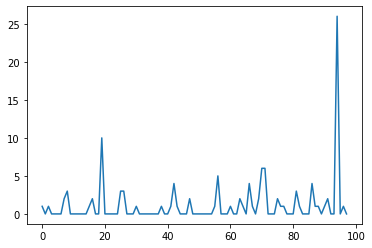

In [32]:
plt.plot(lst)

<font size =6><b> Free Society</b></font>

(array([86.,  8.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0. ,  2.6,  5.2,  7.8, 10.4, 13. , 15.6, 18.2, 20.8, 23.4, 26. ]),
 <a list of 10 Patch objects>)

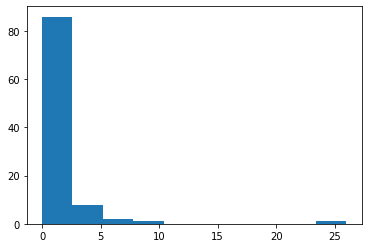

In [33]:
plt.hist(lst)

In [34]:
lst

[1,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 10,
 0,
 0,
 0,
 0,
 0,
 3,
 3,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 4,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 5,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 1,
 0,
 4,
 1,
 0,
 2,
 6,
 6,
 0,
 0,
 0,
 2,
 1,
 1,
 0,
 0,
 0,
 3,
 1,
 0,
 0,
 0,
 4,
 1,
 1,
 0,
 1,
 2,
 0,
 0,
 26,
 0,
 1,
 0]

<font size = 5>Superior Breeding</font>

In [39]:
lst1 =[]
for t in range(100):
        # How much info to print: 0 or 1
    VERBOSITY = 0

    #  overall champ
    ultimatechamp = chromo_typ('', 0.0) 

    # just loop endlessly 
    #while true:
    for j in range(1):
        #  storage for our population of chromosomes.
        # size: [POP_SIZE]
        #List<chromo_typ> Population = new List<chromo_typ>()
        population = []

        #  specify our sexy target number
        sexyTarget= 42

        #  first create a random population, all with zero fitness.
        for i in range(POP_SIZE):
            ct = chromo_typ(GetRandomBits(CHROMO_LENGTH), 0.0)
            population.append(ct) 

        generationsRequiredToFindASolution = 0

        # we will set this flag if a solution has been found
        bFound = False

        # run one experiment up to MAX_ALLOWABLE_GENERATIONS
        lastchamp = chromo_typ('', 0.0)
        while not bFound:
            # this is used during roulette wheel sampling
            totalFitness = 0.0

            #  test and update the fitness of every chromosome in the population
            for ct in population:
                ct.fitness = AssignFitness(ct, sexyTarget)
                totalFitness += ct.fitness

            #  check to see if we have found any solutions
            thechamp = chromo_typ('', 0.0)
            for ct in population:
                #if ct.fitness == 999.0:
                if Phenotype(ct.bits) == sexyTarget:
                    ultimatechamp.fitness = ct.fitness
                    ultimatechamp.bits = ct.bits
                    
                    lst1.append(generationsRequiredToFindASolution)
                    print("=========================")
                    print("Solution found in " + str(generationsRequiredToFindASolution) + " generations! Its genes are:", 
                          DisplayChromo(ct.bits))
                    print("It has phenotype", str(Phenotype(ct.bits)), ", fitness", str(ct.fitness), ", and chromosome", ct.bits)
                    print("=========================")
                    bFound = True
                    break
                
                else:
                    # current experiment champ
                    if ct.fitness > thechamp.fitness:
                        thechamp.fitness = ct.fitness
                        thechamp.bits = ct.bits; 
                    # all experiments champ
                    if ct.fitness > ultimatechamp.fitness:
                        ultimatechamp.fitness = ct.fitness
                        ultimatechamp.bits = ct.bits; 
            if not bFound:
                if VERBOSITY == 1:
                    print("Best chromosome detected in generation " + str(generationsRequiredToFindASolution) + 
                          ", has fitness " + str(thechamp.fitness) + ", phenotype " + str(Phenotype(thechamp.bits)) + 
                          ", and genotype "  + DisplayChromo(thechamp.bits)) 
                elif VERBOSITY == 0:
                    if thechamp.fitness > lastchamp.fitness or generationsRequiredToFindASolution % (MAX_ALLOWABLE_GENERATIONS // 5) == 0:
                        print("Best chromosome detected in generation " + str(generationsRequiredToFindASolution) + 
                              ", has fitness " + str(thechamp.fitness) + ", phenotype " + str(Phenotype(thechamp.bits)) + 
                              ", and genotype "  + DisplayChromo(thechamp.bits)) 
                lastchamp.fitness = thechamp.fitness
                lastchamp.bits = thechamp.bits

            # 
            #  We did not find our champion :-(
            #  create a new population by selecting two parents at a time and creating offspring
            #  by applying crossover and mutation. Do this until the desired number of offspring
            #  have been created
            # 

            # define some temporary storage for the new population we are about to create
            # chromo_typ temp[POP_SIZE]
            #List<chromo_typ> temp = new List<chromo_typ>()
            temp = []

            # loop until we have created POP_SIZE new chromosomes
            cPop = 0
            while cPop < POP_SIZE:
                #  we are going to create the new population by grabbing members of the old 
                #  population two at a time via roulette wheel selection. Individuals are selected
                #  for crossover by a combination of fitness and luck
                #Random r = new Random(GenerationsRequiredToFindASolution)
                fred = RouletteSuperiorFitness(totalFitness, population) #maybe this is not too correct: pick a fred at random instead?
                wilma = RouletteSuperiorFitness(totalFitness, population)
                if fred == '(not fit enough)' or wilma == '(not fit enough)':
                    continue

                #  add crossover dependent on the crossover rate
                bammbamm, pebbles = Crossover(fred, wilma)

                #  mutate dependent on the mutation rate
                bammbamm = Mutate(bammbamm)
                pebbles = Mutate(pebbles)

                # add these offspring to the new population. (assigning zero as their fitness scores)
                # Note that if fred and wilma do create offspring, then fred and wilma essentially die off :-(
                ct1 = chromo_typ(bammbamm, 0.0)
                ct2 = chromo_typ(pebbles, 0.0)
                temp.append(ct1); cPop += 1
                temp.append(ct2); cPop += 1


            # copy new population into main population array
            population.clear()
            population.extend(temp)
            #for i in range(POP_SIZE):
            #    population.append(temp[i])

            generationsRequiredToFindASolution += 1

            #  exit experiment if no solution found within the maximum allowable number
            #  of generations
            if generationsRequiredToFindASolution > MAX_ALLOWABLE_GENERATIONS:
                print("-------------------------")
                print("No exact solutions found!")
                print("Best chromosome found has fitness", str(round(ultimatechamp.fitness, 2)), ", phenotype", 
                      str(Phenotype(ultimatechamp.bits)), ", genotype", DisplayChromo(ultimatechamp.bits), 
                      ", and bits", ultimatechamp.bits)
                print("-------------------------")
                bFound = True
        print("")
        print("*** Next round:")

Best chromosome detected in generation 0, has fitness 0.3333333333333333, phenotype 44, and genotype 9 - 8 * 5 * 7 + 9
Best chromosome detected in generation 2, has fitness 0.5, phenotype 41, and genotype 6 - 8 + 9 * 7 / 7 * 7 - 8
Best chromosome detected in generation 6, has fitness 0.14285714285714285, phenotype 36, and genotype 6 - 9 * 7 - 4 / 7 * 7 - 8
Best chromosome detected in generation 7, has fitness 0.5, phenotype 43, and genotype 4 - 9 * 7 / 7 * 7 - 8
Best chromosome detected in generation 9, has fitness 0.14285714285714285, phenotype 36, and genotype 6 - 9 * 7 / 6 * 7 - 8
Best chromosome detected in generation 11, has fitness 0.5, phenotype 43, and genotype 6 - 9 * 7 / 5 * 7 - 8
Best chromosome detected in generation 97, has fitness 0.5, phenotype 43, and genotype 4 - 9 * 7 / 7 * 7 - 8
Best chromosome detected in generation 100, has fitness 0.3333333333333333, phenotype 40, and genotype 4 - 9 * 7 / 7 * 8
Best chromosome detected in generation 102, has fitness 0.5, phenotype

Best chromosome detected in generation 485, has fitness 0.3333333333333333, phenotype 44, and genotype 0 - 8 * 7 + 5 / 5 * 4
Best chromosome detected in generation 489, has fitness 0.3333333333333333, phenotype 40, and genotype 0 - 8 * 7 + 5 / 7 * 5
Best chromosome detected in generation 494, has fitness 0.3333333333333333, phenotype 40, and genotype 0 - 8 * 7 + 5 / 7 * 5
Best chromosome detected in generation 495, has fitness 0.5, phenotype 41, and genotype 0 - 8 * 7 + 5 / 7 * 4 - 9
Best chromosome detected in generation 497, has fitness 0.5, phenotype 41, and genotype 0 - 8 * 7 + 5 / 7 * 4 - 9
Best chromosome detected in generation 500, has fitness 0.09090909090909091, phenotype 32, and genotype 0 - 8 * 7 + 5 / 7 * 4
-------------------------
No exact solutions found!
Best chromosome found has fitness 0.5 , phenotype 41 , genotype 6 - 8 + 9 * 7 / 7 * 7 - 8 , and bits 0110011010111000101010010111100110011100011100001001010011010111111011000111101110000010001110011000
-----------------

Best chromosome detected in generation 141, has fitness 0.14285714285714285, phenotype 36, and genotype 2 + 1 + 9 / 1 * 3
Best chromosome detected in generation 143, has fitness 0.2, phenotype 46, and genotype 2 + 1 + 8 / 1 * 5 - 9
Best chromosome detected in generation 144, has fitness 0.5, phenotype 41, and genotype 0 + 1 + 9 / 1 * 5 - 9
Best chromosome detected in generation 147, has fitness 0.2, phenotype 46, and genotype 2 + 1 + 8 / 1 * 5 - 9
Best chromosome detected in generation 150, has fitness 0.5, phenotype 41, and genotype 2 + 8 / 1 * 5 - 9
Best chromosome detected in generation 153, has fitness 0.5, phenotype 41, and genotype 2 + 8 / 1 * 5 - 9
Best chromosome detected in generation 156, has fitness 0.3333333333333333, phenotype 44, and genotype 2 - 9 / 1 * 5 - 9
Best chromosome detected in generation 163, has fitness 0.3333333333333333, phenotype 44, and genotype 2 - 9 / 1 * 5 - 9
Best chromosome detected in generation 165, has fitness 0.3333333333333333, phenotype 44, and 

Best chromosome detected in generation 10, has fitness 0.125, phenotype 35, and genotype 8 + 3 + 4 + 8 + 8 + 4
Best chromosome detected in generation 12, has fitness 0.125, phenotype 35, and genotype 8 + 3 + 4 + 8 + 8 + 4
Best chromosome detected in generation 16, has fitness 0.125, phenotype 35, and genotype 8 + 3 + 4 + 8 + 8 + 4
Best chromosome detected in generation 18, has fitness 0.1111111111111111, phenotype 34, and genotype 8 + 6 + 8 + 8 + 4
Best chromosome detected in generation 19, has fitness 0.14285714285714285, phenotype 48, and genotype 8 * 3 + 4 + 8 + 8 + 4
Best chromosome detected in generation 21, has fitness 0.14285714285714285, phenotype 48, and genotype 8 * 3 + 4 + 8 + 8 + 4
Best chromosome detected in generation 26, has fitness 0.1111111111111111, phenotype 34, and genotype 8 + 6 + 8 + 8 + 4
Best chromosome detected in generation 30, has fitness 0.125, phenotype 35, and genotype 8 + 4 + 8 + 8 + 7
Best chromosome detected in generation 31, has fitness 0.1428571428571

Solution found in 185 generations! Its genes are: 1 - 0 - 8 + 1 * 7
It has phenotype 42 , fitness 1.0 , and chromosome 1110101011111110000110110000111010111010100010010111001101010001011101100010101000011100101011000111

*** Next round:
Solution found in 0 generations! Its genes are: 2 - 7 - 4 + 0 + 2 * 6
It has phenotype 42 , fitness 1.0 , and chromosome 0010111010110111010110010001000101101011010001111101000011110111101010101110001010011100011000010110

*** Next round:
Solution found in 0 generations! Its genes are: 6 * 1 * 7 / 1 * 1 *
It has phenotype 42 , fitness 1.0 , and chromosome 0110110000011100110010110111001111010001000001100000010101010000110000010011111000110101110011111101

*** Next round:
Best chromosome detected in generation 0, has fitness 0.25, phenotype 45, and genotype 9 - 1 - 3 * 9
Best chromosome detected in generation 1, has fitness 0.5, phenotype 43, and genotype 7 * 6 + 1
Best chromosome detected in generation 3, has fitness 0.3333333333333333, phenotype 44, an

Best chromosome detected in generation 126, has fitness 0.125, phenotype 35, and genotype 4 / 7 - 7 * 5 -
Best chromosome detected in generation 128, has fitness 0.06666666666666667, phenotype 28, and genotype 4 / 7 - 4 * 7 -
Best chromosome detected in generation 129, has fitness 0.07142857142857142, phenotype 55, and genotype 4 / 7 - 7 - 4 * 5 -
Best chromosome detected in generation 132, has fitness 0.07692307692307693, phenotype 30, and genotype 4 / 7 - 6 * 5 -
Best chromosome detected in generation 134, has fitness 0.125, phenotype 35, and genotype 4 - 7 - 4 * 5 -
Best chromosome detected in generation 139, has fitness 0.125, phenotype 35, and genotype 4 - 7 - 4 * 5 -
Best chromosome detected in generation 142, has fitness 0.125, phenotype 35, and genotype 4 / 7 - 7 * 5 -
Best chromosome detected in generation 145, has fitness 0.06666666666666667, phenotype 28, and genotype 4 / 7 - 4 * 7 -
Best chromosome detected in generation 146, has fitness 0.125, phenotype 35, and genotype 4 

Best chromosome detected in generation 9, has fitness 0.02702702702702703, phenotype 6, and genotype 8 - 7 - 6 + 4 - 5 * 8 / 8
Best chromosome detected in generation 10, has fitness 0.02857142857142857, phenotype 8, and genotype 8 - 7 - 6 + 4 - 5 / 8 * 8
Best chromosome detected in generation 14, has fitness 0.02702702702702703, phenotype 6, and genotype 8 - 7 - 6 + 4 - 5 * 8 / 8
Best chromosome detected in generation 15, has fitness 0.02857142857142857, phenotype 8, and genotype 8 - 7 - 6 + 4 - 5 / 8 * 8
Best chromosome detected in generation 19, has fitness 0.024390243902439025, phenotype 2, and genotype 8 - 3 - 6 + 4 - 5 * 8 / 8
Best chromosome detected in generation 25, has fitness 0.02857142857142857, phenotype 8, and genotype 8 - 3 - 6 + 4 - 5 / 8 * 8
Best chromosome detected in generation 29, has fitness 0.024390243902439025, phenotype 2, and genotype 8 - 3 - 6 + 4 - 5 * 8 / 8
Best chromosome detected in generation 30, has fitness 0.02857142857142857, phenotype 8, and genotype 8

Best chromosome detected in generation 202, has fitness 0.5, phenotype 41, and genotype 7 - 0 * 6 - 5 * 9 / 8
Best chromosome detected in generation 206, has fitness 0.3333333333333333, phenotype 40, and genotype 6 - 0 - 6 - 5 * 8 /
Best chromosome detected in generation 208, has fitness 0.3333333333333333, phenotype 40, and genotype 6 - 0 - 6 - 5 * 8 /
Best chromosome detected in generation 212, has fitness 0.3333333333333333, phenotype 40, and genotype 6 - 0 - 6 - 5 * 8 /
Best chromosome detected in generation 221, has fitness 0.3333333333333333, phenotype 40, and genotype 6 - 0 - 6 - 5 * 8 /
Best chromosome detected in generation 231, has fitness 0.3333333333333333, phenotype 40, and genotype 6 - 0 - 6 - 5 * 8 /
Best chromosome detected in generation 234, has fitness 0.3333333333333333, phenotype 40, and genotype 6 - 0 - 6 - 5 * 8 /
Best chromosome detected in generation 240, has fitness 0.3333333333333333, phenotype 40, and genotype 6 - 0 - 6 - 5 * 8 /
Best chromosome detected in g

Best chromosome detected in generation 121, has fitness 0.05555555555555555, phenotype 59, and genotype 7 + 3 - 5 + 2 * 9 - 4 /
Best chromosome detected in generation 122, has fitness 0.1111111111111111, phenotype 50, and genotype 7 + 3 - 4 * 9 - 4 /
Best chromosome detected in generation 126, has fitness 0.14285714285714285, phenotype 36, and genotype 7 + 3 - 4 + 3 * 4 /
Best chromosome detected in generation 128, has fitness 0.3333333333333333, phenotype 40, and genotype 7 + 4 - 4 + 3 * 4 /
Best chromosome detected in generation 130, has fitness 0.5, phenotype 41, and genotype 7 + 3 - 4 + 3 * 5 - 4 /
Best chromosome detected in generation 190, has fitness 0.3333333333333333, phenotype 40, and genotype 7 + 3 * 4 /
Best chromosome detected in generation 193, has fitness 0.06666666666666667, phenotype 28, and genotype 7 + 7 * 2 /
Best chromosome detected in generation 195, has fitness 0.06666666666666667, phenotype 28, and genotype 7 + 7 * 2 /
Solution found in 197 generations! Its gene

Best chromosome detected in generation 88, has fitness 0.03125, phenotype 11, and genotype 0 + 0 / 2 - 3 / 2 - 9 /
Best chromosome detected in generation 91, has fitness 0.02631578947368421, phenotype 5, and genotype 0 + 0 / 2 - 9 / 2 /
Best chromosome detected in generation 92, has fitness 0.03125, phenotype 11, and genotype 0 + 0 / 2 - 3 / 2 - 9 /
Best chromosome detected in generation 94, has fitness 0.02631578947368421, phenotype 5, and genotype 0 + 0 / 2 - 9 / 2 /
Best chromosome detected in generation 95, has fitness 0.029411764705882353, phenotype 9, and genotype 0 + 0 / 2 - 3 / 2 - 7 /
Best chromosome detected in generation 97, has fitness 0.02702702702702703, phenotype 6, and genotype 0 + 0 / 2 - 3 * 2 /
Best chromosome detected in generation 99, has fitness 0.03125, phenotype 11, and genotype 0 + 0 / 2 - 3 / 2 - 9 /
Best chromosome detected in generation 100, has fitness 0.029411764705882353, phenotype 9, and genotype 0 + 0 / 2 - 3 / 2 - 7 /
Best chromosome detected in genera

Best chromosome detected in generation 243, has fitness 0.029411764705882353, phenotype 9, and genotype 4 / 9 / 8 * 2 - 3 * 3
Best chromosome detected in generation 246, has fitness 0.025, phenotype 3, and genotype 4 / 9 / 8 * 2 - 3
Best chromosome detected in generation 248, has fitness 0.029411764705882353, phenotype 9, and genotype 4 / 9 / 8 * 2 - 3 * 3
Best chromosome detected in generation 254, has fitness 0.02857142857142857, phenotype 8, and genotype 4 / 9 / 8 * 2 - 3 / 3 + 9
Best chromosome detected in generation 258, has fitness 0.029411764705882353, phenotype 9, and genotype 4 / 9 / 8 * 2 - 3 * 3
Best chromosome detected in generation 260, has fitness 0.02857142857142857, phenotype 8, and genotype 4 / 9 / 8 * 2 - 3 / 3 + 9
Best chromosome detected in generation 261, has fitness 0.029411764705882353, phenotype 9, and genotype 4 / 9 / 8 * 2 - 3 * 3
Best chromosome detected in generation 264, has fitness 0.02857142857142857, phenotype 8, and genotype 4 / 9 / 8 * 2 - 3 / 3 - 7
Be

Best chromosome detected in generation 68, has fitness 0.2, phenotype 46, and genotype 9 * 4 + 3 * 1 + 7
Best chromosome detected in generation 70, has fitness 0.041666666666666664, phenotype 19, and genotype 9 + 0 + 3 * 1 + 7
Best chromosome detected in generation 71, has fitness 0.09090909090909091, phenotype 52, and genotype 9 / 4 + 3 * 9 + 7
Best chromosome detected in generation 73, has fitness 0.09090909090909091, phenotype 32, and genotype 9 / 4 + 3 * 5 + 7
Best chromosome detected in generation 78, has fitness 0.2, phenotype 46, and genotype 9 * 4 + 3 * 1 + 7
Best chromosome detected in generation 81, has fitness 0.2, phenotype 46, and genotype 9 * 4 + 3 * 1 + 7
Best chromosome detected in generation 84, has fitness 0.05263157894736842, phenotype 24, and genotype 9 * 9 / 4 - 3 * 1 + 7
Best chromosome detected in generation 87, has fitness 0.05263157894736842, phenotype 24, and genotype 9 * 9 / 4 - 3 * 1 + 7
Best chromosome detected in generation 88, has fitness 0.33333333333333

Best chromosome detected in generation 56, has fitness 0.07692307692307693, phenotype 30, and genotype 0 * 8 / 9 - 6 * 5
Best chromosome detected in generation 57, has fitness 0.125, phenotype 35, and genotype 8 * 8 / 9 * 5
Best chromosome detected in generation 59, has fitness 0.02631578947368421, phenotype 5, and genotype 0 * 8 / 9 - 5
Best chromosome detected in generation 60, has fitness 0.25, phenotype 45, and genotype 0 * 8 / 6 - 9 * 5
Best chromosome detected in generation 64, has fitness 0.25, phenotype 45, and genotype 0 * 8 - 9 * 5
Best chromosome detected in generation 67, has fitness 0.25, phenotype 45, and genotype 0 * 8 - 9 * 5
Best chromosome detected in generation 69, has fitness 0.3333333333333333, phenotype 40, and genotype 2 * 8 / 9 - 9 * 5
Best chromosome detected in generation 71, has fitness 0.3333333333333333, phenotype 40, and genotype 0 / 9 / 9 - 8 * 5
Best chromosome detected in generation 76, has fitness 0.3333333333333333, phenotype 40, and genotype 0 / 6 / 

Best chromosome detected in generation 387, has fitness 0.3333333333333333, phenotype 40, and genotype 6 - 7 / 9 + 0 + 9 * 5
Best chromosome detected in generation 390, has fitness 0.3333333333333333, phenotype 40, and genotype 6 - 7 / 9 / 6 - 0 + 9 * 5
Best chromosome detected in generation 396, has fitness 0.3333333333333333, phenotype 40, and genotype 7 / 9 + 0 + 8 * 5
Best chromosome detected in generation 400, has fitness 0.25, phenotype 45, and genotype 7 / 9 + 0 + 9 * 5
Best chromosome detected in generation 402, has fitness 0.3333333333333333, phenotype 40, and genotype 6 - 7 / 9 + 0 + 9 * 5
Best chromosome detected in generation 410, has fitness 0.3333333333333333, phenotype 40, and genotype 7 / 9 + 0 + 8 * 5
Best chromosome detected in generation 418, has fitness 0.3333333333333333, phenotype 40, and genotype 7 / 9 + 0 + 8 * 5
Best chromosome detected in generation 420, has fitness 0.3333333333333333, phenotype 40, and genotype 7 / 9 + 0 + 8 * 5
Best chromosome detected in ge

Best chromosome detected in generation 247, has fitness 0.3333333333333333, phenotype 40, and genotype 6 - 9 - 0 + 8 * 8
Best chromosome detected in generation 249, has fitness 0.5, phenotype 41, and genotype 6 - 9 - 0 + 8 * 8 + 1
Best chromosome detected in generation 251, has fitness 0.5, phenotype 41, and genotype 6 - 9 - 0 + 8 * 8 + 1
Best chromosome detected in generation 253, has fitness 0.3333333333333333, phenotype 40, and genotype 6 - 9 - 0 + 8 * 8
Best chromosome detected in generation 255, has fitness 0.5, phenotype 41, and genotype 6 - 9 - 0 + 8 * 8 + 1
Best chromosome detected in generation 258, has fitness 0.5, phenotype 41, and genotype 6 - 9 - 0 + 8 * 8 + 1
Best chromosome detected in generation 261, has fitness 0.5, phenotype 41, and genotype 6 - 9 - 0 + 8 * 8 + 1
Best chromosome detected in generation 265, has fitness 0.3333333333333333, phenotype 44, and genotype 6 - 9 - 0 + 8 * 8 + 4
Best chromosome detected in generation 271, has fitness 0.3333333333333333, phenoty

Best chromosome detected in generation 55, has fitness 0.02857142857142857, phenotype 8, and genotype 0 + 7 + 1
Best chromosome detected in generation 57, has fitness 0.029411764705882353, phenotype 9, and genotype 0 + 9
Best chromosome detected in generation 59, has fitness 0.029411764705882353, phenotype 9, and genotype 8 + 1
Best chromosome detected in generation 62, has fitness 0.029411764705882353, phenotype 9, and genotype 0 + 9
Best chromosome detected in generation 64, has fitness 0.029411764705882353, phenotype 9, and genotype 0 + 9
Best chromosome detected in generation 66, has fitness 0.029411764705882353, phenotype 9, and genotype 0 + 9
Best chromosome detected in generation 72, has fitness 0.029411764705882353, phenotype 9, and genotype 8 + 1
Best chromosome detected in generation 74, has fitness 0.029411764705882353, phenotype 9, and genotype 8 + 1
Best chromosome detected in generation 76, has fitness 0.025, phenotype 3, and genotype 0 + 3
Best chromosome detected in gen

Best chromosome detected in generation 240, has fitness 0.07692307692307693, phenotype 54, and genotype 0 - 9 + 0 * 6
Best chromosome detected in generation 242, has fitness 0.025, phenotype 3, and genotype 0 - 9 - 9 + 0 / 6
Best chromosome detected in generation 243, has fitness 0.07692307692307693, phenotype 54, and genotype 0 - 9 + 0 * 6
Best chromosome detected in generation 247, has fitness 0.14285714285714285, phenotype 48, and genotype 0 + 1 - 9 + 0 * 6
Best chromosome detected in generation 250, has fitness 0.07692307692307693, phenotype 54, and genotype 0 - 9 + 0 * 6
Best chromosome detected in generation 253, has fitness 0.03571428571428571, phenotype 15, and genotype 0 - 9 + 0 - 6
Best chromosome detected in generation 255, has fitness 0.03571428571428571, phenotype 15, and genotype 0 - 9 + 0 - 6
Best chromosome detected in generation 258, has fitness 0.029411764705882353, phenotype 9, and genotype 0 - 9 + 0 /
Best chromosome detected in generation 260, has fitness 0.0263157

Best chromosome detected in generation 425, has fitness 0.06666666666666667, phenotype 56, and genotype 0 - 8 * 7 + 0 /
Best chromosome detected in generation 428, has fitness 0.05263157894736842, phenotype 24, and genotype 0 - 8 * 3 + 0 /
Best chromosome detected in generation 431, has fitness 0.037037037037037035, phenotype 16, and genotype 0 - 8 - 8 + 0 /
Best chromosome detected in generation 433, has fitness 0.037037037037037035, phenotype 16, and genotype 0 + 8 + 8 + 0 /
Best chromosome detected in generation 436, has fitness 0.05263157894736842, phenotype 24, and genotype 0 - 0 + 8 * 3 + 0 /
Best chromosome detected in generation 438, has fitness 0.06666666666666667, phenotype 56, and genotype 0 - 0 + 8 * 7 + 0 /
Best chromosome detected in generation 439, has fitness 0.14285714285714285, phenotype 36, and genotype 4 - 0 + 8 * 3 + 0 /
Best chromosome detected in generation 441, has fitness 0.14285714285714285, phenotype 48, and genotype 8 - 0 + 8 * 3 + 0 /
Best chromosome detect

Best chromosome detected in generation 54, has fitness 0.05555555555555555, phenotype 25, and genotype 2 - 8 - 7 - 8 - 3 + 1 - 2 +
Best chromosome detected in generation 57, has fitness 0.3333333333333333, phenotype 40, and genotype 2 - 8 - 7 * 3 + 1 - 2 +
Best chromosome detected in generation 59, has fitness 0.5, phenotype 41, and genotype 2 - 8 - 7 * 3 / 1 - 2 +
Best chromosome detected in generation 61, has fitness 0.5, phenotype 41, and genotype 2 - 8 - 7 * 3 / 1 - 2 +
Solution found in 64 generations! Its genes are: 2 - 8 - 7 * 3 - 1 - 2 +
It has phenotype 42 , fitness 1.0 , and chromosome 0010111011111011100000101011011101010011100000010011110000111011110100010000101111111010001010011010

*** Next round:
Solution found in 0 generations! Its genes are: 8 + 2 - 0 / 7 * 8 * 1 - 1 * 6 +
It has phenotype 42 , fitness 1.0 , and chromosome 1111111110000011101000101011000000100101110101110111001011001000111111000001101100010011110001101010

*** Next round:
Solution found in 0 generation

Best chromosome detected in generation 105, has fitness 0.25, phenotype 39, and genotype 3 + 2 + 3 * 4 + 6 - 7 + 8 -
Best chromosome detected in generation 108, has fitness 0.14285714285714285, phenotype 36, and genotype 3 + 3 * 4 + 6 - 2 + 8 -
Best chromosome detected in generation 109, has fitness 0.25, phenotype 45, and genotype 3 + 3 * 4 + 6 + 7 + 8 -
Best chromosome detected in generation 111, has fitness 0.5, phenotype 43, and genotype 3 + 3 * 6 + 6 - 7 + 8 -
Best chromosome detected in generation 113, has fitness 0.5, phenotype 43, and genotype 3 + 3 * 6 + 6 - 7 + 8 -
Best chromosome detected in generation 116, has fitness 0.25, phenotype 45, and genotype 3 + 3 * 4 + 6 + 7 + 8 -
Best chromosome detected in generation 117, has fitness 0.5, phenotype 43, and genotype 3 + 3 * 6 + 6 - 7 + 8 -
Best chromosome detected in generation 119, has fitness 0.3333333333333333, phenotype 40, and genotype 3 + 5 * 4 + 7 - 7 + 8 -
Best chromosome detected in generation 120, has fitness 0.5, pheno

Best chromosome detected in generation 30, has fitness 0.02631578947368421, phenotype 5, and genotype 5 + 0
Best chromosome detected in generation 32, has fitness 0.02631578947368421, phenotype 5, and genotype 5 + 0
Best chromosome detected in generation 40, has fitness 0.125, phenotype 35, and genotype 5 + 0 * 7
Best chromosome detected in generation 46, has fitness 0.02564102564102564, phenotype 4, and genotype 5 + 0 / 7 + 4
Best chromosome detected in generation 48, has fitness 0.02564102564102564, phenotype 4, and genotype 5 + 0 / 7 + 4
Best chromosome detected in generation 49, has fitness 0.02631578947368421, phenotype 5, and genotype 5 + 0
Best chromosome detected in generation 50, has fitness 0.125, phenotype 35, and genotype 5 + 0 * 7
Best chromosome detected in generation 57, has fitness 0.125, phenotype 35, and genotype 5 + 0 * 7
Best chromosome detected in generation 59, has fitness 0.02631578947368421, phenotype 5, and genotype 5 + 0
Best chromosome detected in generation 

Best chromosome detected in generation 69, has fitness 0.03125, phenotype 11, and genotype 9 * 2 / 8 - 8 - 5 /
Best chromosome detected in generation 71, has fitness 0.03125, phenotype 11, and genotype 9 * 2 / 8 - 8 - 5 /
Best chromosome detected in generation 73, has fitness 0.03333333333333333, phenotype 13, and genotype 9 * 2 / 8 - 8 - 7 /
Best chromosome detected in generation 76, has fitness 0.03333333333333333, phenotype 13, and genotype 9 * 2 / 8 - 8 - 7 /
Best chromosome detected in generation 79, has fitness 0.03333333333333333, phenotype 13, and genotype 9 * 2 / 8 - 8 - 7 /
Best chromosome detected in generation 83, has fitness 0.03333333333333333, phenotype 13, and genotype 9 * 2 / 8 - 8 - 7 /
Best chromosome detected in generation 86, has fitness 0.03125, phenotype 11, and genotype 9 - 2 / 8 - 8 - 3 /
Best chromosome detected in generation 90, has fitness 0.03125, phenotype 11, and genotype 2 * 2 / 8 - 8 - 3 /
Best chromosome detected in generation 94, has fitness 0.03125, 

Best chromosome detected in generation 3, has fitness 0.125, phenotype 35, and genotype 6 - 3 / 6 + 7 - 2 * 7
Best chromosome detected in generation 6, has fitness 0.125, phenotype 35, and genotype 6 - 3 / 6 + 7 - 2 * 7
Best chromosome detected in generation 9, has fitness 0.058823529411764705, phenotype 26, and genotype 6 - 3 * 7 + 7 - 2
Best chromosome detected in generation 10, has fitness 0.3333333333333333, phenotype 40, and genotype 6 - 3 / 7 + 7 - 2 * 8
Best chromosome detected in generation 13, has fitness 0.06666666666666667, phenotype 56, and genotype 6 - 3 / 7 + 7 - 0 * 8
Best chromosome detected in generation 18, has fitness 0.02857142857142857, phenotype 8, and genotype 6 + 3 / 7 + 7 - 0 + 0
Best chromosome detected in generation 20, has fitness 0.043478260869565216, phenotype 64, and genotype 6 + 3 / 7 + 7 - 0 * 8
Best chromosome detected in generation 23, has fitness 0.02857142857142857, phenotype 8, and genotype 6 + 3 / 7 + 7 - 0
Best chromosome detected in generation 2

Best chromosome detected in generation 3, has fitness 0.5, phenotype 41, and genotype 4 * 0 * 6 - 9 * 9 / 2 *
Solution found in 5 generations! Its genes are: 4 + 0 * 6 - 5 * 9 / 4 *
It has phenotype 42 , fitness 1.0 , and chromosome 0100100010101100000001101100011001010100001010001011010110011111110010010010011111011110101001001100

*** Next round:
Best chromosome detected in generation 0, has fitness 0.5, phenotype 43, and genotype 5 + 1 + 0 * 8 - 5
Best chromosome detected in generation 13, has fitness 0.3333333333333333, phenotype 40, and genotype 5 - 4 - 5 - 1 + 0 * 8 /
Best chromosome detected in generation 16, has fitness 0.3333333333333333, phenotype 40, and genotype 5 - 4 - 5 - 1 + 0 * 8 /
Best chromosome detected in generation 18, has fitness 0.3333333333333333, phenotype 40, and genotype 5 - 4 - 5 - 1 + 0 * 8 /
Best chromosome detected in generation 34, has fitness 0.25, phenotype 45, and genotype 4 - 3 - 5 - 1 + 0 * 9 /
Best chromosome detected in generation 43, has fitness 

Best chromosome detected in generation 430, has fitness 0.3333333333333333, phenotype 40, and genotype 5 - 6 + 6 * 8 *
Best chromosome detected in generation 433, has fitness 0.14285714285714285, phenotype 48, and genotype 5 - 2 - 6 * 2 * 8 *
Best chromosome detected in generation 435, has fitness 0.3333333333333333, phenotype 40, and genotype 5 - 2 - 6 + 8 * 8 *
Best chromosome detected in generation 437, has fitness 0.3333333333333333, phenotype 40, and genotype 5 - 2 - 6 + 8 * 8 *
Best chromosome detected in generation 441, has fitness 0.14285714285714285, phenotype 48, and genotype 5 - 2 - 6 * 2 * 8 *
Best chromosome detected in generation 442, has fitness 0.3333333333333333, phenotype 40, and genotype 5 - 2 - 6 - 2 * 8 *
Best chromosome detected in generation 446, has fitness 0.14285714285714285, phenotype 48, and genotype 5 - 2 - 6 + 9 * 8 *
Best chromosome detected in generation 449, has fitness 0.14285714285714285, phenotype 48, and genotype 5 - 2 - 6 + 9 * 8 *
Best chromosome 

Best chromosome detected in generation 28, has fitness 0.07692307692307693, phenotype 30, and genotype 1 - 2 + 7 * 5 +
Best chromosome detected in generation 30, has fitness 0.034482758620689655, phenotype 14, and genotype 9 - 2 + 7 +
Best chromosome detected in generation 31, has fitness 0.03571428571428571, phenotype 15, and genotype 1 - 2 + 7 + 9 +
Best chromosome detected in generation 34, has fitness 0.03571428571428571, phenotype 15, and genotype 1 - 2 + 7 + 9 +
Best chromosome detected in generation 35, has fitness 0.07692307692307693, phenotype 30, and genotype 1 - 2 + 7 * 5 +
Best chromosome detected in generation 38, has fitness 0.09090909090909091, phenotype 32, and genotype 1 - 2 + 7 * 5 + 2
Best chromosome detected in generation 40, has fitness 0.2, phenotype 38, and genotype 1 - 2 - 7 * 5 + 2
Best chromosome detected in generation 46, has fitness 0.03225806451612903, phenotype 12, and genotype 1 - 8 - 7 + 2
Best chromosome detected in generation 47, has fitness 0.2, pheno

Best chromosome detected in generation 404, has fitness 0.25, phenotype 45, and genotype 3 - 1 + 1 + 2 * 9
Best chromosome detected in generation 409, has fitness 0.25, phenotype 45, and genotype 3 - 1 + 3 * 9
Best chromosome detected in generation 420, has fitness 0.25, phenotype 45, and genotype 3 - 1 / 6 + 3 + 2 * 9
Best chromosome detected in generation 425, has fitness 0.3333333333333333, phenotype 40, and genotype 3 - 1 + 3 + 0 * 8
Best chromosome detected in generation 428, has fitness 0.3333333333333333, phenotype 40, and genotype 3 - 1 + 3 + 0 * 8
Best chromosome detected in generation 432, has fitness 0.3333333333333333, phenotype 40, and genotype 3 - 1 + 3 + 0 * 8
Best chromosome detected in generation 459, has fitness 0.3333333333333333, phenotype 40, and genotype 3 - 1 + 3 * 8
Best chromosome detected in generation 469, has fitness 0.3333333333333333, phenotype 40, and genotype 3 - 1 + 3 * 8
Best chromosome detected in generation 472, has fitness 0.3333333333333333, phenot

Solution found in 12 generations! Its genes are: 0 - 8 * 8 - 9 / 2 - 5
It has phenotype 42 , fitness 1.0 , and chromosome 1110110011100000100010111000110010111100100010111001110100100000100001000111100110001111101101010010

*** Next round:
Solution found in 0 generations! Its genes are: 7 - 9 - 2 - 3 + 0 * 6 +
It has phenotype 42 , fitness 1.0 , and chromosome 0111011010111001101100100100010110111110111100110100001001101111001101000100101000001100111101101010

*** Next round:
Best chromosome detected in generation 0, has fitness 0.5, phenotype 41, and genotype 6 * 9 - 6 - 4 - 3
Best chromosome detected in generation 2, has fitness 0.5, phenotype 43, and genotype 5 * 8 / 4 * 4 + 3 *
Best chromosome detected in generation 5, has fitness 0.5, phenotype 43, and genotype 5 * 8 + 4 / 5 * 5 + 3 *
Best chromosome detected in generation 8, has fitness 0.5, phenotype 43, and genotype 5 * 8 + 4 / 5 * 5 + 3 *
Best chromosome detected in generation 10, has fitness 0.1, phenotype 33, and genotype 5 

Best chromosome detected in generation 108, has fitness 0.030303030303030304, phenotype 10, and genotype 2 * 5
Best chromosome detected in generation 110, has fitness 0.030303030303030304, phenotype 10, and genotype 2 * 5
Best chromosome detected in generation 113, has fitness 0.030303030303030304, phenotype 10, and genotype 2 * 5
Best chromosome detected in generation 115, has fitness 0.02564102564102564, phenotype 4, and genotype 2 / 5 - 4
Best chromosome detected in generation 118, has fitness 0.02564102564102564, phenotype 4, and genotype 2 / 5 / 5 - 4
Best chromosome detected in generation 120, has fitness 0.023809523809523808, phenotype 1, and genotype 2 - 7 / 5 / 5
Best chromosome detected in generation 125, has fitness 0.024390243902439025, phenotype 2, and genotype 2 * 5 / 5
Best chromosome detected in generation 126, has fitness 0.02564102564102564, phenotype 4, and genotype 2 / 5 / 5 - 4
Best chromosome detected in generation 128, has fitness 0.02631578947368421, phenotype 5

<font size =6><b> Superior Breeding</b></font>

(array([72.,  7.,  3.,  2.,  4.,  0.,  2.,  0.,  2.,  2.]),
 array([  0. ,  47.8,  95.6, 143.4, 191.2, 239. , 286.8, 334.6, 382.4,
        430.2, 478. ]),
 <a list of 10 Patch objects>)

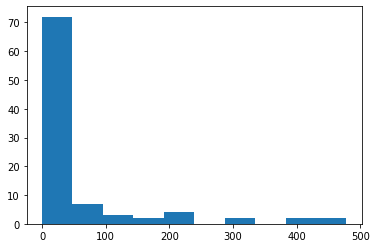

In [40]:
plt.hist(lst1)

<font size=5> Caste Based</font>

In [54]:
lst2 =[]
for t in range(100):
        # How much info to print: 0 or 1
    VERBOSITY = 0

    #  overall champ
    ultimatechamp = chromo_typ('', 0.0) 

    # just loop endlessly 
    #while true:
    for j in range(1):
        #  storage for our population of chromosomes.
        # size: [POP_SIZE]
        #List<chromo_typ> Population = new List<chromo_typ>()
        population = []

        #  specify our sexy target number
        sexyTarget= 42

        #  first create a random population, all with zero fitness.
        for i in range(POP_SIZE):
            ct = chromo_typ(GetRandomBits(CHROMO_LENGTH), 0.0)
            population.append(ct) 

        generationsRequiredToFindASolution = 0

        # we will set this flag if a solution has been found
        bFound = False

        # run one experiment up to MAX_ALLOWABLE_GENERATIONS
        lastchamp = chromo_typ('', 0.0)
        while not bFound:
            # this is used during roulette wheel sampling
            totalFitness = 0.0

            #  test and update the fitness of every chromosome in the population
            for ct in population:
                ct.fitness = AssignFitness(ct, sexyTarget)
                totalFitness += ct.fitness

            #  check to see if we have found any solutions
            thechamp = chromo_typ('', 0.0)
            for ct in population:
                #if ct.fitness == 999.0:
                if Phenotype(ct.bits) == sexyTarget:
                    ultimatechamp.fitness = ct.fitness
                    ultimatechamp.bits = ct.bits
                    
                    lst2.append(generationsRequiredToFindASolution)
                    print("=========================")
                    print("Solution found in " + str(generationsRequiredToFindASolution) + " generations! Its genes are:", 
                          DisplayChromo(ct.bits))
                    print("It has phenotype", str(Phenotype(ct.bits)), ", fitness", str(ct.fitness), ", and chromosome", ct.bits)
                    print("=========================")
                    bFound = True
                    break
                
                else:
                    # current experiment champ
                    if ct.fitness > thechamp.fitness:
                        thechamp.fitness = ct.fitness
                        thechamp.bits = ct.bits; 
                    # all experiments champ
                    if ct.fitness > ultimatechamp.fitness:
                        ultimatechamp.fitness = ct.fitness
                        ultimatechamp.bits = ct.bits; 
            if not bFound:
                if VERBOSITY == 1:
                    print("Best chromosome detected in generation " + str(generationsRequiredToFindASolution) + 
                          ", has fitness " + str(thechamp.fitness) + ", phenotype " + str(Phenotype(thechamp.bits)) + 
                          ", and genotype "  + DisplayChromo(thechamp.bits)) 
                elif VERBOSITY == 0:
                    if thechamp.fitness > lastchamp.fitness or generationsRequiredToFindASolution % (MAX_ALLOWABLE_GENERATIONS // 5) == 0:
                        print("Best chromosome detected in generation " + str(generationsRequiredToFindASolution) + 
                              ", has fitness " + str(thechamp.fitness) + ", phenotype " + str(Phenotype(thechamp.bits)) + 
                              ", and genotype "  + DisplayChromo(thechamp.bits)) 
                lastchamp.fitness = thechamp.fitness
                lastchamp.bits = thechamp.bits

            # 
            #  We did not find our champion :-(
            #  create a new population by selecting two parents at a time and creating offspring
            #  by applying crossover and mutation. Do this until the desired number of offspring
            #  have been created
            # 

            # define some temporary storage for the new population we are about to create
            # chromo_typ temp[POP_SIZE]
            #List<chromo_typ> temp = new List<chromo_typ>()
            temp = []

            # loop until we have created POP_SIZE new chromosomes
            cPop = 0
            while cPop < POP_SIZE:
                #  we are going to create the new population by grabbing members of the old 
                #  population two at a time via roulette wheel selection. Individuals are selected
                #  for crossover by a combination of fitness and luck
                #Random r = new Random(GenerationsRequiredToFindASolution)
                fred = RouletteCaste(totalFitness, population) #maybe this is not too correct: pick a fred at random instead?
                wilma = RouletteCaste(totalFitness, population)
                if fred == '(not fit enough)' or wilma == '(not fit enough)':
                    continue

                #  add crossover dependent on the crossover rate
                bammbamm, pebbles = Crossover(fred, wilma)

                #  mutate dependent on the mutation rate
                bammbamm = Mutate(bammbamm)
                pebbles = Mutate(pebbles)

                # add these offspring to the new population. (assigning zero as their fitness scores)
                # Note that if fred and wilma do create offspring, then fred and wilma essentially die off :-(
                ct1 = chromo_typ(bammbamm, 0.0)
                ct2 = chromo_typ(pebbles, 0.0)
                temp.append(ct1); cPop += 1
                temp.append(ct2); cPop += 1


            # copy new population into main population array
            population.clear()
            population.extend(temp)
            #for i in range(POP_SIZE):
            #    population.append(temp[i])

            generationsRequiredToFindASolution += 1

            #  exit experiment if no solution found within the maximum allowable number
            #  of generations
            if generationsRequiredToFindASolution > MAX_ALLOWABLE_GENERATIONS:
                print("-------------------------")
                print("No exact solutions found!")
                print("Best chromosome found has fitness", str(round(ultimatechamp.fitness, 2)), ", phenotype", 
                      str(Phenotype(ultimatechamp.bits)), ", genotype", DisplayChromo(ultimatechamp.bits), 
                      ", and bits", ultimatechamp.bits)
                print("-------------------------")
                bFound = True
        print("")
        print("*** Next round:")

Solution found in 0 generations! Its genes are: 9 - 9 + 6 * 7
It has phenotype 42 , fitness 1.0 , and chromosome 1001000110111001000000110010111010010011001101010010100001000011011101011010011001101100101110100111

*** Next round:
Solution found in 0 generations! Its genes are: 8 * 0 + 2 + 1 * 2 * 7
It has phenotype 42 , fitness 1.0 , and chromosome 1101100011001111000011101111101010110010011110010101101000011100001000010110110010110111011001110001

*** Next round:
Solution found in 0 generations! Its genes are: 0 - 3 * 8 - 0 + 5 - 6 - 9 - 8 -
It has phenotype 42 , fitness 1.0 , and chromosome 0000101111010011000111001000100001011011111000001010010110110110111010111001100010011011110010001011

*** Next round:
Solution found in 0 generations! Its genes are: 9 / 9 / 3 - 3 * 1 * 7 * 2
It has phenotype 42 , fitness 1.0 , and chromosome 1001110111111001111101010010100111011010110110110011111110110011110000011100011111001110001011110010

*** Next round:
Best chromosome detected in generation

Solution found in 2 generations! Its genes are: 1 - 9 - 1 - 5 * 9 / 3 - 0
It has phenotype 42 , fitness 1.0 , and chromosome 0001101110011000101100011001101101011100100100110101010001010011110111110011111000000000111110110000

*** Next round:
Best chromosome detected in generation 0, has fitness 0.5, phenotype 41, and genotype 2 * 0 + 5 * 8 + 1
Solution found in 1 generations! Its genes are: 6 * 7
It has phenotype 42 , fitness 1.0 , and chromosome 110001100111110010100111010

*** Next round:
Solution found in 0 generations! Its genes are: 8 + 4 * 4 - 6 / 1
It has phenotype 42 , fitness 1.0 , and chromosome 1000111010010011011000001010010010001100111011001110010000111011101001101101110110111010000100010101

*** Next round:
Best chromosome detected in generation 0, has fitness 0.2, phenotype 38, and genotype 7 * 6 - 4 +
Best chromosome detected in generation 1, has fitness 0.5, phenotype 43, and genotype 7 / 1 + 0 * 5 + 8 *
Solution found in 2 generations! Its genes are: 0 - 7 * 5 - 7
It

Solution found in 39 generations! Its genes are: 1 + 0 - 3 + 0 * 5 * 4 - 2 + 0 /
It has phenotype 42 , fitness 1.0 , and chromosome 0001111001000100101000001011001100111010000001001100010100000110110001001011110000101101000001111101

*** Next round:
Best chromosome detected in generation 0, has fitness 0.5, phenotype 41, and genotype 5 * 1 * 8 + 1 +
Solution found in 2 generations! Its genes are: 5 + 1 * 6 + 2 + 4
It has phenotype 42 , fitness 1.0 , and chromosome 1011101110100101101000011100011010000110111000110011101000101010111111011010111001000101011110000000

*** Next round:
Best chromosome detected in generation 0, has fitness 0.3333333333333333, phenotype 40, and genotype 5 + 4 + 2 / 2 * 8
Solution found in 1 generations! Its genes are: 1 - 8 * 1 - 0 * 6
It has phenotype 42 , fitness 1.0 , and chromosome 0001011110010111111111110000001100011011100011000001010001001011000011101001111100001100111110100110

*** Next round:
Solution found in 0 generations! Its genes are: 2 * 0 * 3 -

Best chromosome detected in generation 0, has fitness 0.5, phenotype 41, and genotype 1 + 9 * 4 + 3 - 2 /
Solution found in 2 generations! Its genes are: 5 * 8 + 2
It has phenotype 42 , fitness 1.0 , and chromosome 1111010100101100101110001111000000111111111101010011100010010000100100100010101000100111011101111111

*** Next round:
Best chromosome detected in generation 0, has fitness 0.3333333333333333, phenotype 40, and genotype 8 * 5 * 8 + 6 - 3 / 8
Solution found in 1 generations! Its genes are: 4 * 8 + 5 + 5 * 1
It has phenotype 42 , fitness 1.0 , and chromosome 0100110011001110111010001110011100010001001000010010111100111010110101011010110001011000110011110001

*** Next round:
Solution found in 0 generations! Its genes are: 7 * 7 - 7 + 0
It has phenotype 42 , fitness 1.0 , and chromosome 0111011000010110100000011001100101100100110011010111011101100011101101111010000011111110100001111111

*** Next round:
Solution found in 0 generations! Its genes are: 6 * 8 * 8 * 3 * 0 * 8 + 6 * 7


<font size =6><b>Caste based society</b></font>

(array([96.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([  0.,  11.,  22.,  33.,  44.,  55.,  66.,  77.,  88.,  99., 110.]),
 <a list of 10 Patch objects>)

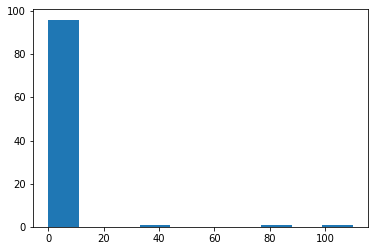

In [55]:
plt.hist(lst2)

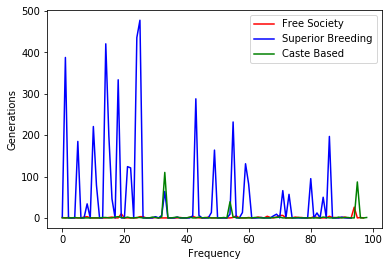

In [61]:
plt.plot(lst, color='r', label="Free Society")
plt.plot(lst1, color = 'b', label ="Superior Breeding")
plt.plot(lst2, color = 'g', label ="Caste Based")
plt.xlabel('Frequency')
plt.ylabel('Generations')
plt.legend()

<font size = 5><b>Conclusion </b></font>

<b>As you can see from the graph, Free society is able to find the ideal solution within few generation. So, free society is the society that reaches to the sexy target first.
SuperiorSociety that is Nazi concept of superior breeding is not the ideal society as we can see not many reaches the ideal solution within few generations.
We can see, in caste based society there are very few who reaches to the ideal solution. Also, possibilty of mating also reduces drasticaaly for caste based society</b>

In [83]:
type(totalFitness)

float

In [28]:
%whos

Variable                             Type          Data/Info
------------------------------------------------------------
AssignFitness                        function      <function AssignFitness at 0x000001F976377EE8>
BinToDec                             function      <function BinToDec at 0x000001F9763775E8>
CHROMO_LENGTH                        int           30
CROSSOVER_RATE                       float         0.6
Compare4Crossover                    function      <function Compare4Crossov<...>er at 0x000001F976338D38>
Compare4Mutation                     function      <function Compare4Mutation at 0x000001F976338CA8>
Crossover                            function      <function Crossover at 0x000001F976338C18>
DisplayChromo                        function      <function DisplayChromo at 0x000001F9763811F8>
DisplayChromo_old                    function      <function DisplayChromo_o<...>ld at 0x000001F976381048>
DisplayGeneSymbol                    function      <function DisplayGen

It looks to me that we kinda get *stuck* in local minima. Maybe my hyperparameters are not so good?

# Homework

With the right hyperparameters, compare how a *free* society reproduces with one where reproduction is dictated by forcing *sexiest* chromosomes to reproduce (eugenics), and one where society is *stratified* into *castes* and forced to reproduce within a caste system (allowing for spurious exceptions).

The objective of your hw is to compare eugenics, castes, and roulette wheel selection.

Roulette wheel is how species freely evolve in a Darwinian way.

Eugenic proponents, Nazi Germany amongst them, suggest that a superior race is created when we breed individuals with the best fitness, and we kill off individuals with poor fitness. Write the equivalent algorithm to Roulette Wheel selection for eugenics.

Caste-based societies evolve with rules, not allowing members of inferior fitness to reproduce with member of superior fitness. Assume a certain number of castes and write the equivalent of Roulette wheel selection for caste-based societies. Allow for a few escapees from the "Law".

Then, do data science. Run many experiments with different examples of sexiness, different hyperparameters, and compare all 3 societies. Which society achieves sexy target the fastest? What happens to the fitness of the rest of society? Discuss, and conclude.